In [1]:
import numpy as np
import pandas as pd

n = 100
rng = np.random.default_rng(1)

x_1 = rng.normal(size =n)
x_2 = rng.normal(size =n)
eps = rng.normal(size =n)
y = 3 * x_1 - 2 * x_2 + 4 + eps

In [2]:
import statsmodels.api as sm

def simple_reg(feature, y):
    x = sm.add_constant(feature)
    results = sm.OLS(y, x).fit()
    return results.params

In [3]:
beta_1 = 1
beta_2 = None
beta_0 = None

iterations = []

for i in range(1000):
    beta_0, beta_2 = simple_reg(x_2, y - beta_1 * x_1)
    beta_0, beta_1 = simple_reg(x_1, y - beta_2 * x_2)

    iterations.append((beta_0, beta_1, beta_2))
    
    if i % 100 == 0 or i < 10:
        print(f"Iteration {i}: beta0 = {beta_0}, beta1 = {beta_1}, beta2 = {beta_2}")


Iteration 0: beta0 = 3.8335005279468053, beta1 = 2.9853299244081777, beta2 = -2.0601448796636546
Iteration 1: beta0 = 3.8369945346384586, beta1 = 2.9867738415275698, beta2 = -2.0141865608875302
Iteration 2: beta0 = 3.8369970758060576, beta1 = 2.9867748916787926, beta2 = -2.014153135710967
Iteration 3: beta0 = 3.836997077654231, beta1 = 2.9867748924425603, beta2 = -2.014153111401061
Iteration 4: beta0 = 3.836997077655575, beta1 = 2.986774892443115, beta2 = -2.014153111383381
Iteration 5: beta0 = 3.8369970776555773, beta1 = 2.9867748924431163, beta2 = -2.014153111383368
Iteration 6: beta0 = 3.8369970776555773, beta1 = 2.9867748924431163, beta2 = -2.014153111383368
Iteration 7: beta0 = 3.8369970776555773, beta1 = 2.9867748924431163, beta2 = -2.014153111383368
Iteration 8: beta0 = 3.8369970776555773, beta1 = 2.9867748924431163, beta2 = -2.014153111383368
Iteration 9: beta0 = 3.8369970776555773, beta1 = 2.9867748924431163, beta2 = -2.014153111383368
Iteration 100: beta0 = 3.8369970776555773

The results show that the backfitting algorithm converges extremely quickly for this linear regression example. By iteration 0, the estimates are already close to the true coefficients, with $\beta_0 \approx 3.83$, $\beta_1 \approx 2.99$, and $\beta_2 \approx -2.06$. By iteration 1, the estimates refine further, moving to $\beta_0 \approx 3.84$, $\beta_1 \approx 2.99$, and $\beta_2 \approx -2.01$. After just a couple of iterations, the values essentially stabilize, and by iteration 2 the coefficients have reached their converged values: $\beta_0 \approx 3.837$, $\beta_1 \approx 2.987$, and $\beta_2 \approx -2.014$. These estimates remain unchanged across all subsequent iterations (up to 900), confirming that the backfitting process rapidly finds the least squares solution and that no further improvement occurs beyond the first few updates.

In [4]:
X = pd.DataFrame({"x1": x_1, "x2": x_2})
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

axline0, axline1, axline2 = model.params

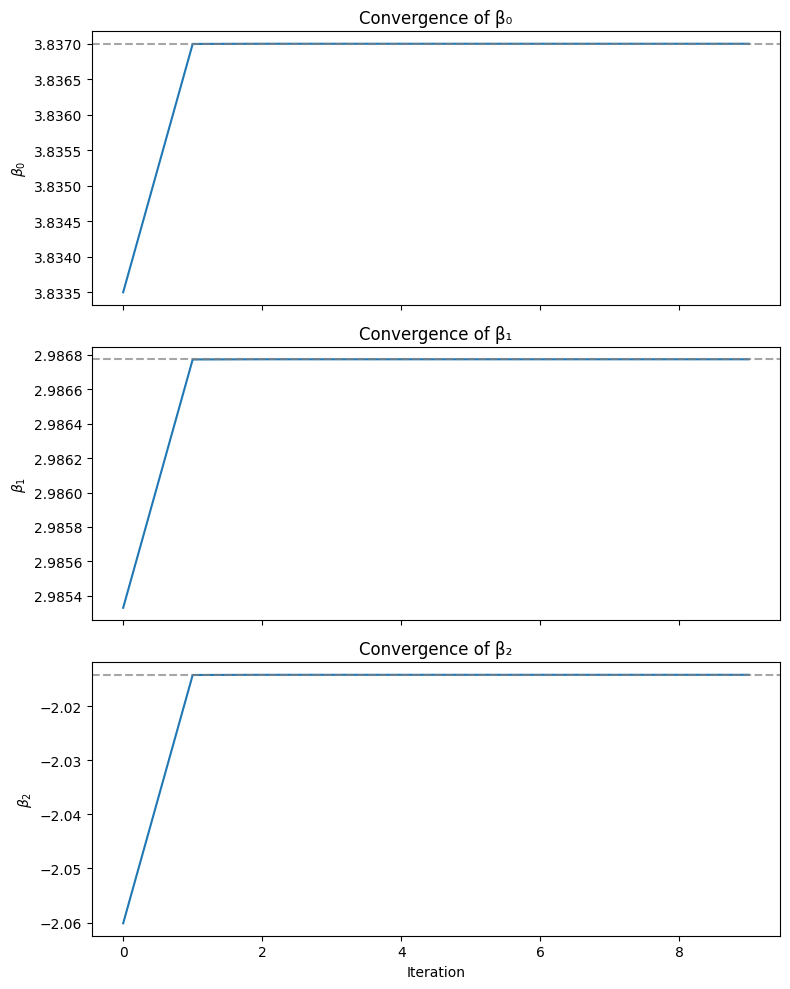

In [5]:
import matplotlib.pyplot as plt



iterations = np.array(iterations[:10])

# Plot each coefficient separately
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

axes[0].plot(iterations[:,0])
axes[0].axhline(axline0, color="gray", linestyle="--", alpha=0.7)
axes[0].set_ylabel(r"$\beta_0$")
axes[0].set_title("Convergence of β₀")

axes[1].plot(iterations[:,1])
axes[1].axhline(axline1, color="gray", linestyle="--", alpha=0.7)
axes[1].set_ylabel(r"$\beta_1$")
axes[1].set_title("Convergence of β₁")

axes[2].plot(iterations[:,2])
axes[2].axhline(axline2, color="gray", linestyle="--", alpha=0.7)
axes[2].set_ylabel(r"$\beta_2$")
axes[2].set_title("Convergence of β₂")
axes[2].set_xlabel("Iteration")

plt.tight_layout()
plt.show()

The convergence plots clearly show that all three coefficients ($\beta_0, \beta_1, \beta_2$) rapidly settle to their final values almost immediately. In fact, after the very first iteration, the estimates already lie essentially on top of the ordinary least squares (OLS) solution obtained from the multiple regression fit. Subsequent iterations only refine the values at the level of numerical precision, with no visible changes in the graphs. This behavior highlights that backfitting, when applied to multiple linear regression, converges in just a single pass to the same coefficients that would be obtained from the direct OLS solution, since the problem is quadratic and has a unique, closed-form optimum.